# laptop BRAN2020 clim demo sandbox

Date: 18 April, 2024

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

### BRAN2020 is on the order of 50TB of float data over nearly 9000 `netcdf` file assests in total.

#### required packages

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#more plotting
import matplotlib.dates as mdates
#import seaborn as sns
from streamjoy import stream
import streamjoy
import streamjoy.xarray
import textwrap

In [2]:
xr.__version__

'2024.2.0'

#### ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### start a local Dask client

In [4]:
import dask
from dask.distributed import Client, LocalCluster

with dask.config.set({"distributed.scheduler.worker-saturation": 1.0,
                      "distributed.nanny.pre-spawn-environ.MALLOC_TRIM_THRESHOLD_": 0,
                    "logging.distributed": "error"}):
        cluster = LocalCluster(n_workers=4,threads_per_worker=1,memory_limit='6GB')
        client = Client(cluster)
        print(client)

<Client: 'tcp://127.0.0.1:64663' processes=4 threads=4, memory=22.35 GiB>


# inspecting the draft results

In [5]:
results_path = '/Users/moo270/data/climatology-demo/tmp_troubleshoot/'
file = results_path+'BRAN2020_clim_demo_mld.nc'
stats_dataset = xr.open_dataset(file,chunks={})

In [6]:
stats_dataset

<xarray.Dataset> Size: 7GB
Dimensions:                  (month: 12, yt_ocean: 1500, xt_ocean: 3600)
Coordinates:
  * xt_ocean                 (xt_ocean) float64 29kB 0.05 0.15 ... 359.9 360.0
  * yt_ocean                 (yt_ocean) float64 12kB -74.95 -74.85 ... 74.95
  * month                    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/28)
    mean_mld                 (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    min_mld                  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    max_mld                  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    std_mld                  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    median_mld               (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    quantile_05_mld          (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    ...                       ...
    min_neutral_mld          (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    max_neutral_mld          (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    std_neutral_mld          (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    median_neutral_mld       (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    quantile_05_neutral_mld  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    quantile_95_neutral_mld  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
Attributes: (12/13)
    NumFilesInSet:                   20
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    grid_tile:                       N/A
    grid_type:                       regular
    intake_esm_attrs:_data_format_:  netcdf
    ...                              ...
    intake_esm_attrs:source:         BRAN2020
    intake_esm_attrs:time_period:    daily
    intake_esm_attrs:variable:       mld
    intake_esm_dataset_key:          ocean.daily
    intake_esm_vars:                 mld
    title:                           BRAN2020

In [7]:
stats_dataset.nbytes/1e9

7.257640896

In [8]:
stats_dataset

<xarray.Dataset> Size: 7GB
Dimensions:                  (month: 12, yt_ocean: 1500, xt_ocean: 3600)
Coordinates:
  * xt_ocean                 (xt_ocean) float64 29kB 0.05 0.15 ... 359.9 360.0
  * yt_ocean                 (yt_ocean) float64 12kB -74.95 -74.85 ... 74.95
  * month                    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/28)
    mean_mld                 (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    min_mld                  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    max_mld                  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    std_mld                  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    median_mld               (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    quantile_05_mld          (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    ...                       ...
    min_neutral_mld          (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    max_neutral_mld          (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    std_neutral_mld          (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    median_neutral_mld       (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    quantile_05_neutral_mld  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
    quantile_95_neutral_mld  (month, yt_ocean, xt_ocean) float32 259MB dask.array<chunksize=(12, 1500, 3600), meta=np.ndarray>
Attributes: (12/13)
    NumFilesInSet:                   20
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    grid_tile:                       N/A
    grid_type:                       regular
    intake_esm_attrs:_data_format_:  netcdf
    ...                              ...
    intake_esm_attrs:source:         BRAN2020
    intake_esm_attrs:time_period:    daily
    intake_esm_attrs:variable:       mld
    intake_esm_dataset_key:          ocean.daily
    intake_esm_vars:                 mld
    title:                           BRAN2020

In [9]:
toy_data = stats_dataset.coarsen({'yt_ocean':50,'xt_ocean':50}).mean()

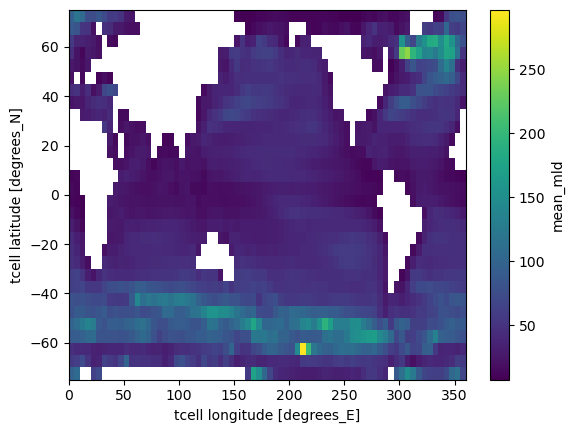

In [13]:
toy_data.mean_mld.mean('month').plot()

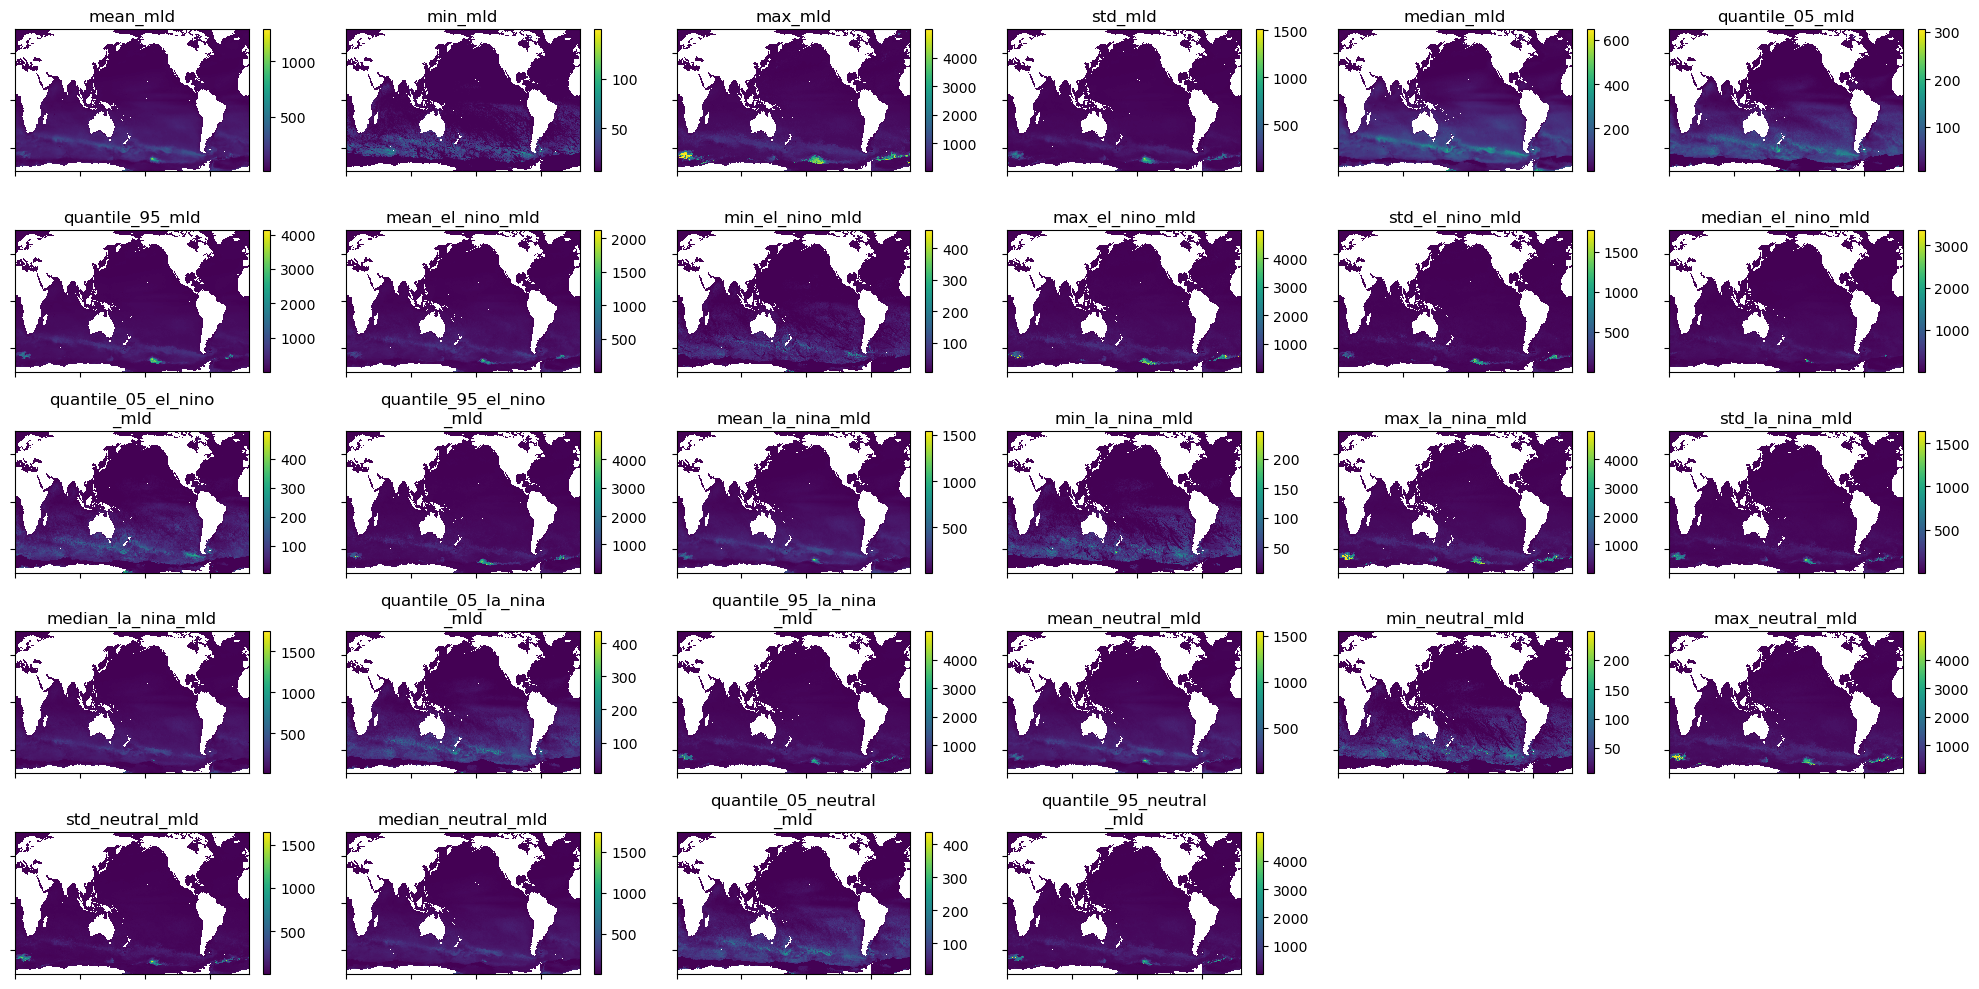

In [14]:
import matplotlib.pyplot as plt

# Get the variable names from the dataset
variable_names = stats_dataset.data_vars.keys()

# Calculate the number of rows and columns for subplots
num_vars = len(variable_names)
num_rows = int(np.sqrt(num_vars))
num_cols = int(np.ceil(num_vars / num_rows))

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), sharex=True, sharey=True)

# Flatten the axes array if necessary
if num_vars == 1:
    axes = np.array([axes])

# Plot each variable on a separate subplot
for i, var_name in enumerate(variable_names):
    row = i // num_cols
    col = i % num_cols
    stats_dataset[var_name].isel(month=6).plot(ax=axes[row, col], label=var_name,add_labels=False)

    # Set subplot title
    axes[row, col].set_title('\n'.join(textwrap.wrap(var_name, 19)))
    

    # Remove coordinate labels
    axes[row, col].set_xticklabels([])
    axes[row, col].set_yticklabels([])

# Remove empty subplots
if num_vars < num_rows * num_cols:
    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


# equator plots

In [15]:
equator = stats_dataset.sel(yt_ocean=0,method='nearest').drop('yt_ocean')
equator

<xarray.Dataset> Size: 5MB
Dimensions:                  (month: 12, xt_ocean: 3600)
Coordinates:
  * xt_ocean                 (xt_ocean) float64 29kB 0.05 0.15 ... 359.9 360.0
  * month                    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/28)
    mean_mld                 (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    min_mld                  (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    max_mld                  (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    std_mld                  (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    median_mld               (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    quantile_05_mld          (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    ...                       ...
    min_neutral_mld          (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    max_neutral_mld          (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    std_neutral_mld          (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    median_neutral_mld       (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    quantile_05_neutral_mld  (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    quantile_95_neutral_mld  (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
Attributes: (12/13)
    NumFilesInSet:                   20
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    grid_tile:                       N/A
    grid_type:                       regular
    intake_esm_attrs:_data_format_:  netcdf
    ...                              ...
    intake_esm_attrs:source:         BRAN2020
    intake_esm_attrs:time_period:    daily
    intake_esm_attrs:variable:       mld
    intake_esm_dataset_key:          ocean.daily
    intake_esm_vars:                 mld
    title:                           BRAN2020

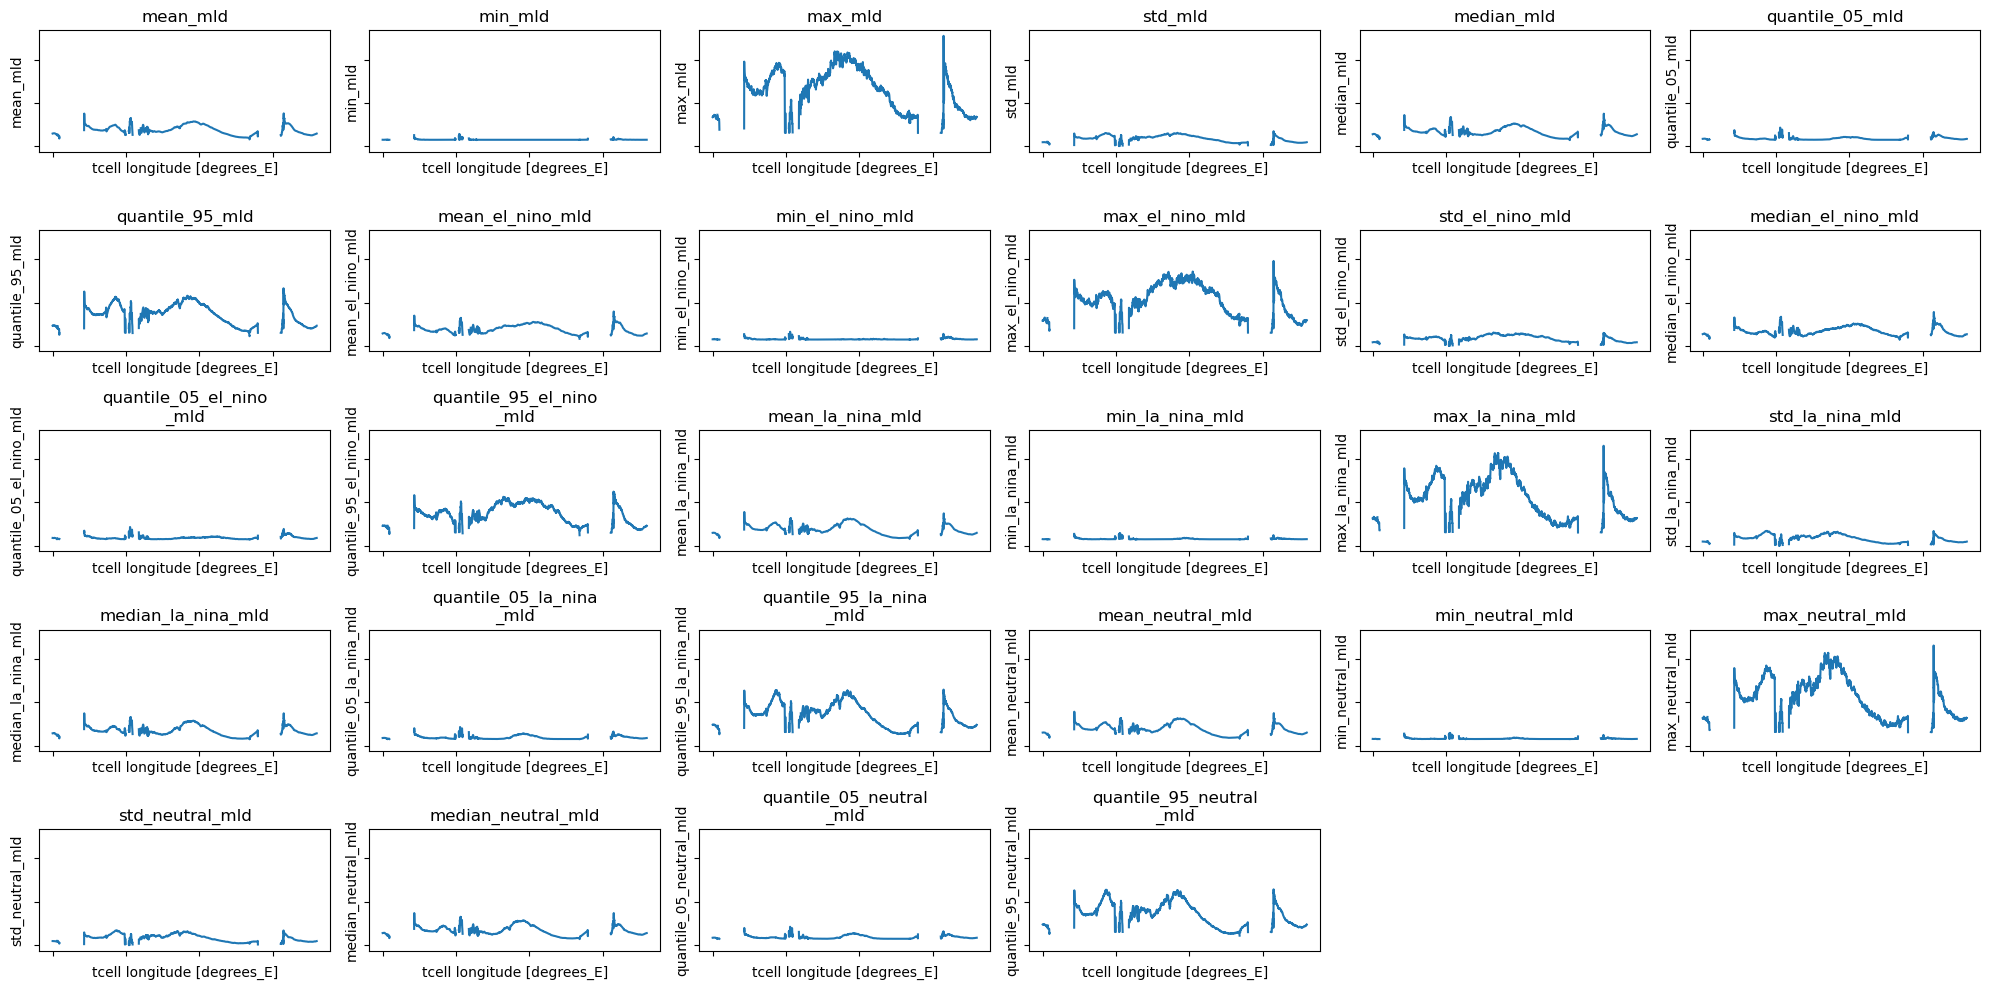

In [16]:
# Get the variable names from the dataset
variable_names = equator.data_vars.keys()

# Calculate the number of rows and columns for subplots
num_vars = len(variable_names)
num_rows = int(np.sqrt(num_vars))
num_cols = int(np.ceil(num_vars / num_rows))

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10), sharex=True, sharey=True)

# Flatten the axes array if necessary
if num_vars == 1:
    axes = np.array([axes])

# Plot each variable as a line plot on a separate subplot
for i, var_name in enumerate(variable_names):
    row = i // num_cols
    col = i % num_cols
    equator[var_name].mean('month').plot.line(ax=axes[row, col], label=var_name)

    # Set subplot title
    axes[row, col].set_title('\n'.join(textwrap.wrap(var_name, 19)))

    # Remove coordinate labels
    axes[row, col].set_xticklabels([])
    axes[row, col].set_yticklabels([])

# Remove empty subplots
if num_vars < num_rows * num_cols:
    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

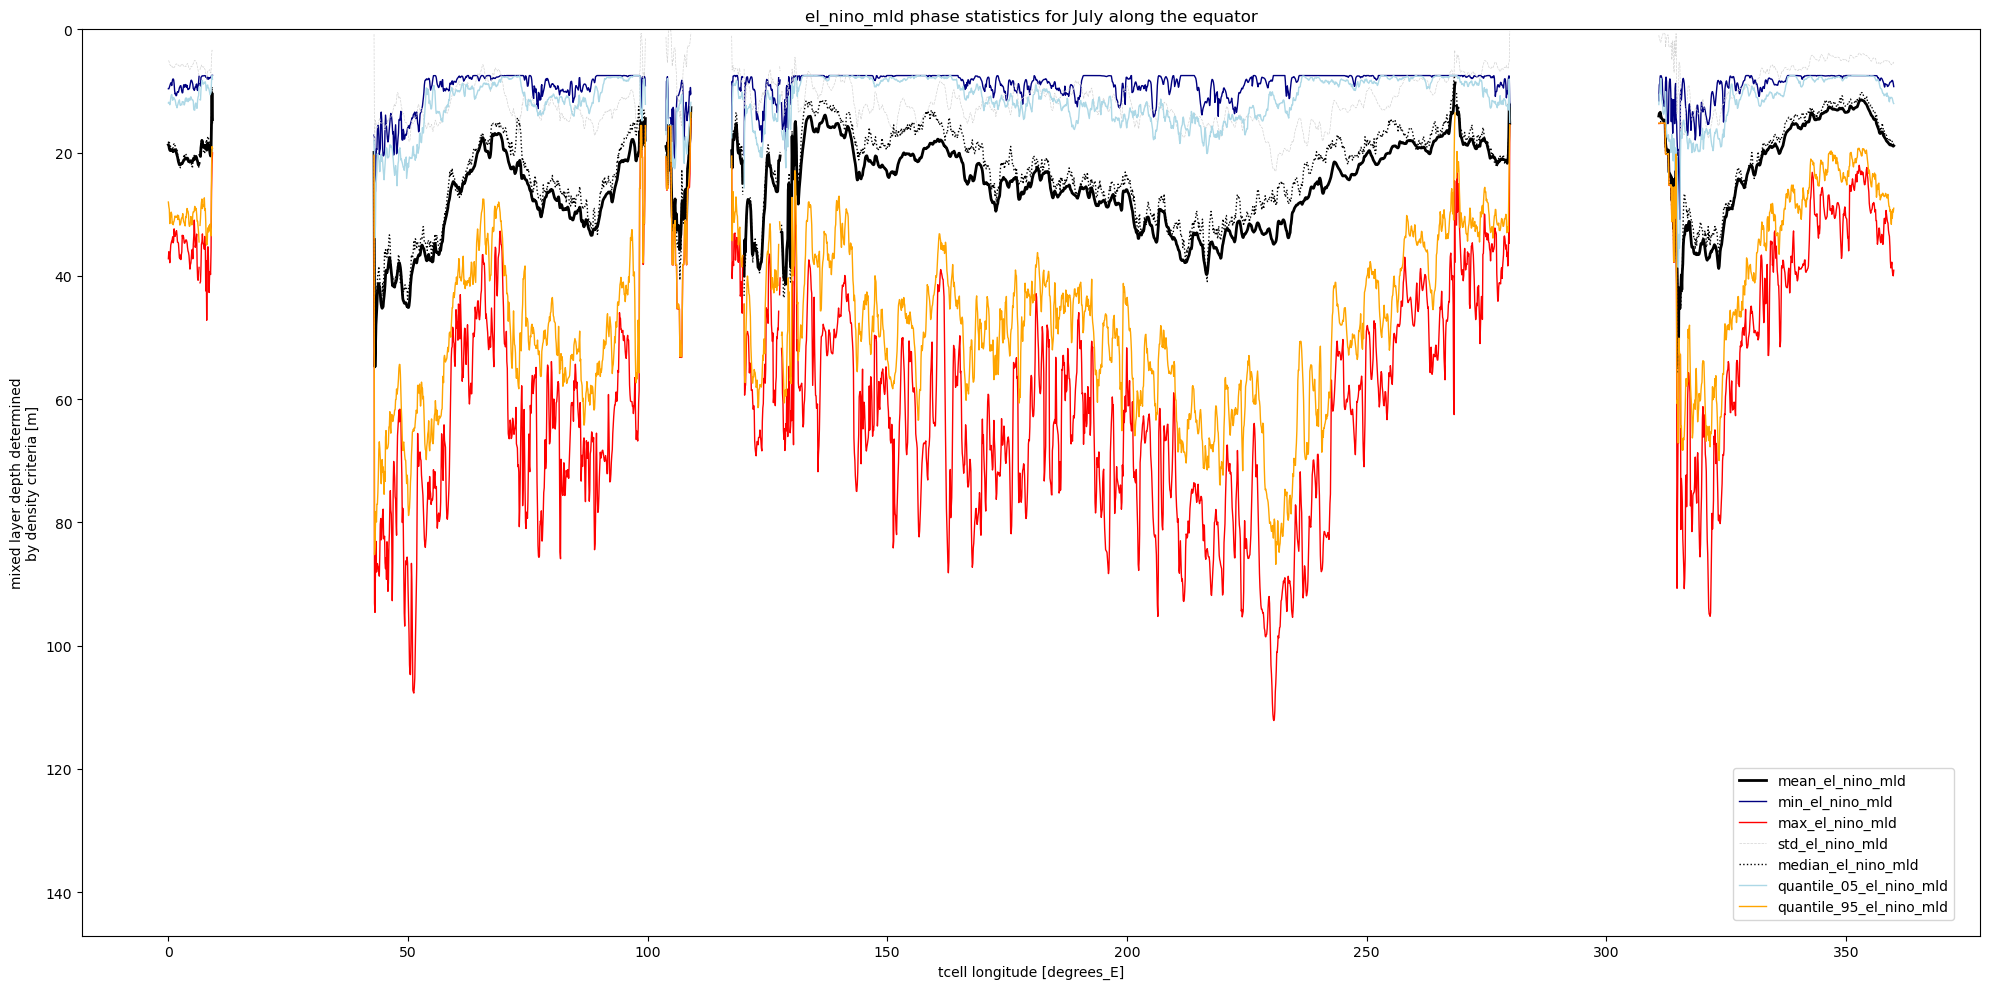

In [38]:
# Select variables based on text in their names
keyword = 'el_nino_mld'
variable_names = equator.data_vars.keys()
selected_vars = [var_name for var_name in variable_names if keyword in var_name]

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Define color, width, and style options based on text in variable names
colors = ['lightgrey' if 'std_' in var_name else 'navy' if 'min_' in var_name else 'red' if 'max_' in var_name else 'orange' if 'quantile_95_' in var_name else 'lightblue' if 'quantile_05_' in var_name else 'black' for var_name in selected_vars]
widths = [2 if 'mean_' in var_name else 0.5 if 'std_' in var_name else 1 for var_name in selected_vars]
styles = ['--' if 'std_' in var_name else ':' if 'median_' in var_name else '-' for var_name in selected_vars]

# Plot each selected variable as a line plot with custom color, width, and style
for i, var_name in enumerate(selected_vars):
    color = colors[i % len(colors)]
    width = widths[i % len(widths)]
    style = styles[i % len(styles)]
    equator[var_name].isel(month=6).plot.line(ax=ax, x='xt_ocean', label=var_name, color=color, linewidth=width, linestyle=style)
    # Set y-axis limits
    max_all = equator.isel(month=6).max().to_dataarray().max().values
    max_all = max_all * 1.05
    ax.set_ylim(0, max_all)

# Set subplot title
ax.set_title(keyword+' phase statistics for July along the equator')

# Add a legend outside of the plot box
ax.legend(bbox_to_anchor=(0.99, 0.01), loc='lower right')

# add zero line
#plt.axhline(0, color='grey', linewidth=1, linestyle='--')

# Invert the y-axis
ax.invert_yaxis()

# Tighten the plot
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
midpac = stats_dataset.sel(xt_ocean=200,method='nearest').drop('xt_ocean')
midpac

<xarray.Dataset> Size: 2MB
Dimensions:                  (month: 12, yt_ocean: 1500)
Coordinates:
  * yt_ocean                 (yt_ocean) float64 12kB -74.95 -74.85 ... 74.95
  * month                    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/28)
    mean_mld                 (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    min_mld                  (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    max_mld                  (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    std_mld                  (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    median_mld               (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    quantile_05_mld          (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    ...                       ...
    min_neutral_mld          (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    max_neutral_mld          (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    std_neutral_mld          (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    median_neutral_mld       (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    quantile_05_neutral_mld  (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
    quantile_95_neutral_mld  (month, yt_ocean) float32 72kB dask.array<chunksize=(12, 1500), meta=np.ndarray>
Attributes: (12/13)
    NumFilesInSet:                   20
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    grid_tile:                       N/A
    grid_type:                       regular
    intake_esm_attrs:_data_format_:  netcdf
    ...                              ...
    intake_esm_attrs:source:         BRAN2020
    intake_esm_attrs:time_period:    daily
    intake_esm_attrs:variable:       mld
    intake_esm_dataset_key:          ocean.daily
    intake_esm_vars:                 mld
    title:                           BRAN2020

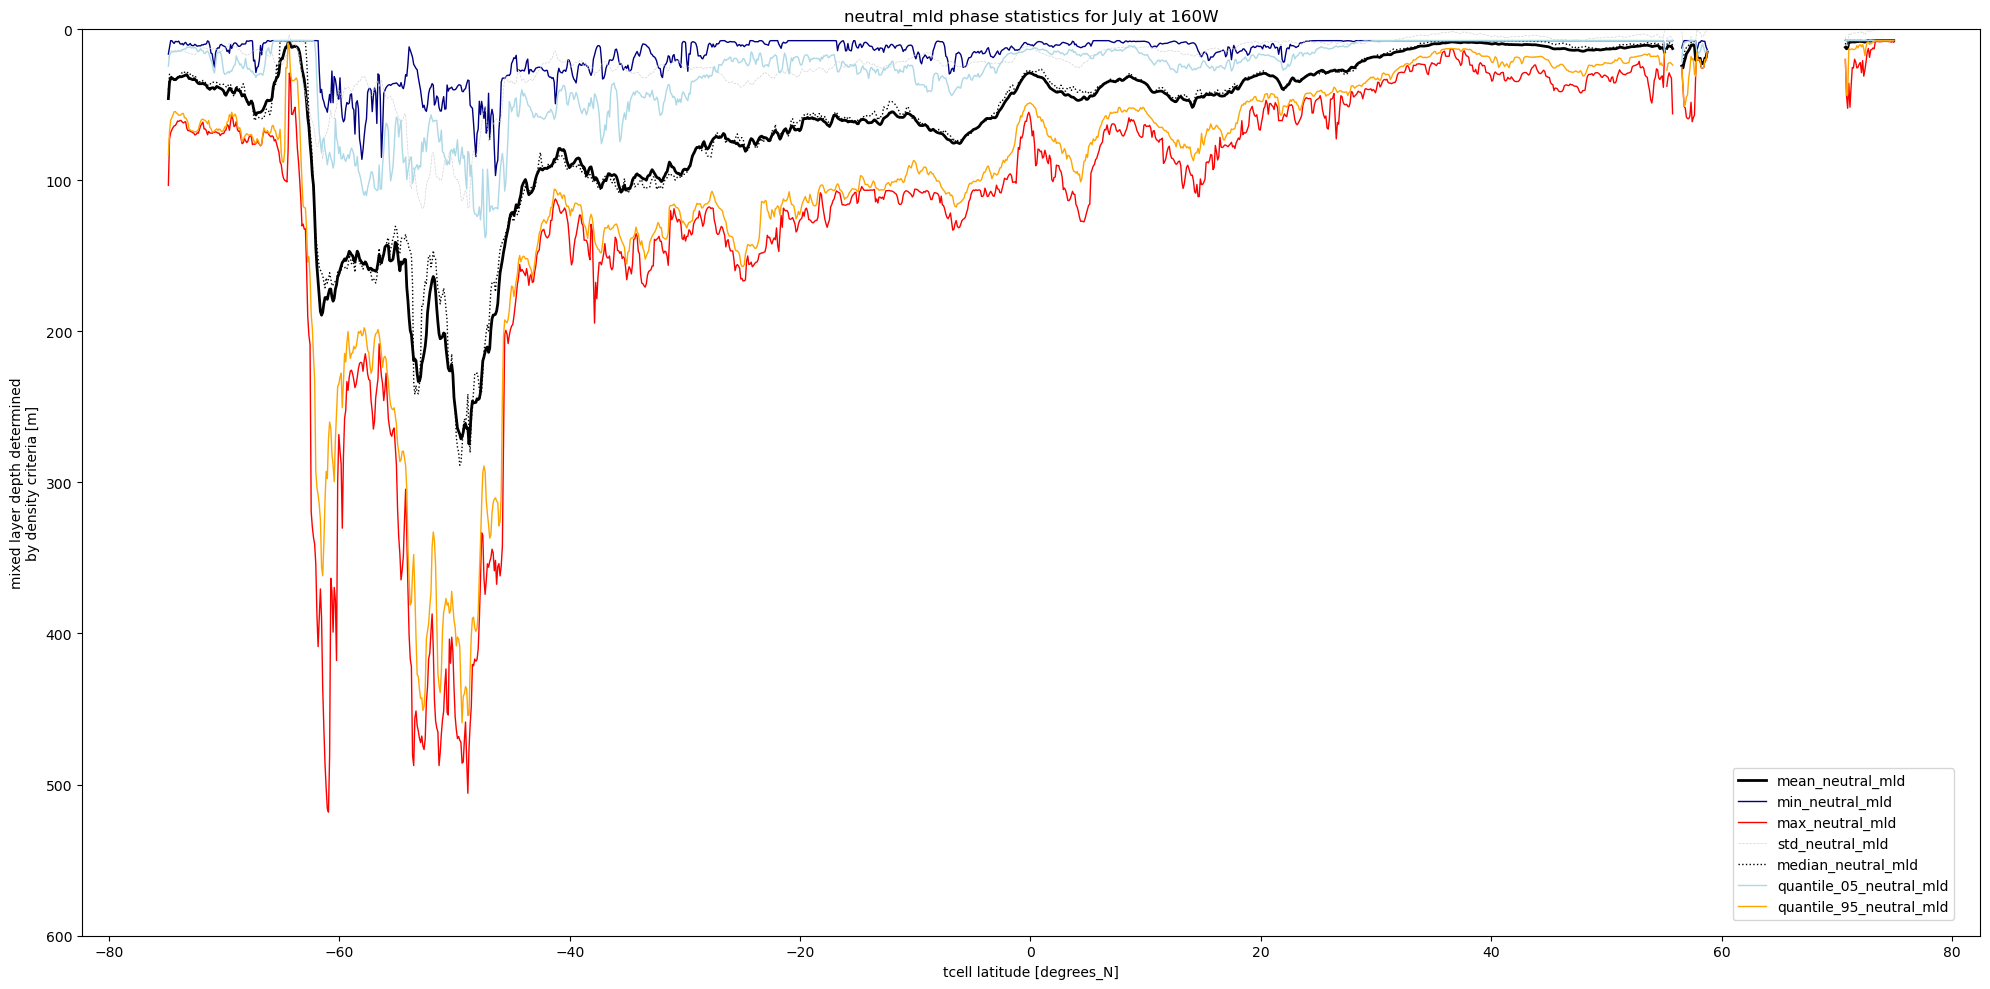

In [36]:
# Select variables based on text in their names
keyword = 'neutral_mld'
variable_names = midpac.data_vars.keys()
selected_vars = [var_name for var_name in variable_names if keyword in var_name]

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Define color, width, and style options based on text in variable names
colors = ['lightgrey' if 'std_' in var_name else 'navy' if 'min_' in var_name else 'red' if 'max_' in var_name else 'orange' if 'quantile_95_' in var_name else 'lightblue' if 'quantile_05_' in var_name else 'black' for var_name in selected_vars]
widths = [2 if 'mean_' in var_name else 0.5 if 'std_' in var_name else 1 for var_name in selected_vars]
styles = ['--' if 'std_' in var_name else ':' if 'median_' in var_name else '-' for var_name in selected_vars]

# Plot each selected variable as a line plot with custom color, width, and style
for i, var_name in enumerate(selected_vars):
    color = colors[i % len(colors)]
    width = widths[i % len(widths)]
    style = styles[i % len(styles)]
    midpac[var_name].isel(month=6).plot.line(ax=ax, x='yt_ocean', label=var_name, color=color, linewidth=width, linestyle=style)
    # Set y-axis limits
    max_all = midpac.isel(month=6).max().to_dataarray().max().values
    max_all = max_all * 1.05
    max_all = 600
    ax.set_ylim(0, max_all)

# Set subplot title
ax.set_title(keyword+' phase statistics for July at 160W')

# Add a legend outside of the plot box
ax.legend(bbox_to_anchor=(0.99, 0.01), loc='lower right')

# Invert the y-axis
ax.invert_yaxis()

# add zero line
#plt.axhline(0, color='grey', linewidth=1, linestyle='--')

# Tighten the plot
plt.tight_layout()

# Show the plot
plt.show()

# $The$ $End$

In [ ]:
client.shutdown()

## Plot current vectors for August

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from matplotlib import mlab, cm, gridspec
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline 

In [ ]:
%%time
# Define the u and v components of the currents
time_choice = 8
u = clim_uv.u.sel(month=time_choice)
v = clim_uv.v.sel(month=time_choice)
speed = np.sqrt(u**2 + v**2)

In [ ]:
#plot model data
transform = ccrs.PlateCarree()
cmap = 'Spectral_r'
cbar_label='current speed'
plot_data = speed

###
fig = plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
ax = plt.subplot(projection=ccrs.PlateCarree(180))
ax.set_extent([142,160, -25, -10], ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='white'))
ax.coastlines('50m',linewidth=0.5,edgecolor='grey')
plot_data.plot(transform=transform,cmap=cmap,cbar_kwargs={'label': cbar_label,'shrink':0.5},robust=True)

#plot u/v vectors
# Define the x and y coordinates
x = clim_uv.xu_ocean
y = clim_uv.yu_ocean
ax.quiver(x.values,y.values,u.values,v.values,transform=transform, units='x', width=0.01, scale=0.7, headwidth=2,alpha=0.2)
ax.set_title('BRAN2020 1993-2022\ncurrent speed \n August Climatology')